# Compare SP mode simulations

In [3]:
import xarray as xr  # NetCDF data handling
import matplotlib.pyplot as plt  # Plotting
import datetime as dt  # for workaround with long simulations (beyond year 2262)
from pathlib import Path
import pandas as pd
import numpy as np

In [4]:
# Path to concatenated land archive output
output_data_path = f"../../results"

file_paths = {
    'IBSP': "alp4-1500-cosmo-IBSP",
    'IWSP': "alp4-1500-warmed-IWSP"
}

# Enter the names of single output files from each simulation, created with the 'combine_model_history_files' notebook.
file_path_IBSP = f"{output_data_path}/{file_paths['IBSP']}/alp4-1500-cosmo-IBSP.0-1500.nc"
file_path_IWSP = f"{output_data_path}/{file_paths['IWSP']}/alp4-1500-warmed-IWSP.0-1500.nc"

In [5]:
# Read data
file_paths = {
    'IBSP': file_path_IBSP,
    'IWSP': file_path_IWSP
}

data = {}

for dataset, path in file_paths.items():
    data[dataset] = xr.open_mfdataset(path, 
                                      combine='by_coords', 
                                      decode_times=True)

In [5]:
IBSP_GPP = data['IBSP']['FATES_GPP'].values.reshape(-1) 
IWSP_GPP = data['IWSP']['FATES_GPP'].values.reshape(-1) 
IWSP_GPP.shape

(18000,)

In [6]:
# Check if there is any difference in GPP between the two simulations
np.array_equiv(data['IBSP']['FATES_GPP'], data['IWSP']['FATES_GPP']) # Returns True if input arrays are shape consistent and all elements equal.


False

In [7]:
IBSP_NEP = data['IBSP']['FATES_NEP'].values.reshape(-1) 
IWSP_NEP = data['IWSP']['FATES_NEP'].values.reshape(-1) 
IWSP_NEP.shape

(18000,)

In [8]:
np.array_equiv(IBSP_NEP, IWSP_NEP)

False

In [9]:
IBSP_AUTORESP = data['IBSP']['FATES_AUTORESP'].values.reshape(-1) 
IWSP_AUTORESP = data['IWSP']['FATES_AUTORESP'].values.reshape(-1) 
IWSP_AUTORESP.shape

(18000,)

In [10]:
np.array_equiv(IBSP_AUTORESP, IWSP_AUTORESP)

False

In [15]:
IBSP_HET_RESP = data['IBSP']['FATES_HET_RESP'].values.reshape(-1) 
IWSP_HET_RESP = data['IWSP']['FATES_HET_RESP'].values.reshape(-1) 
IWSP_HET_RESP.shape

(18000,)

In [16]:
np.array_equiv(IBSP_HET_RESP, IWSP_HET_RESP)

True

In [6]:
IBSP_TLAI = data['IBSP']['TLAI'].values.reshape(-1) 
IWSP_TLAI = data['IWSP']['TLAI'].values.reshape(-1) 
IWSP_TLAI.shape

(18000,)

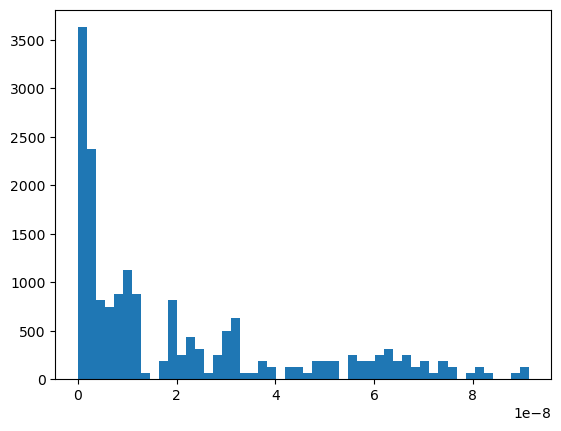

In [11]:
plt.hist(IBSP_GPP, bins=50)
plt.show()

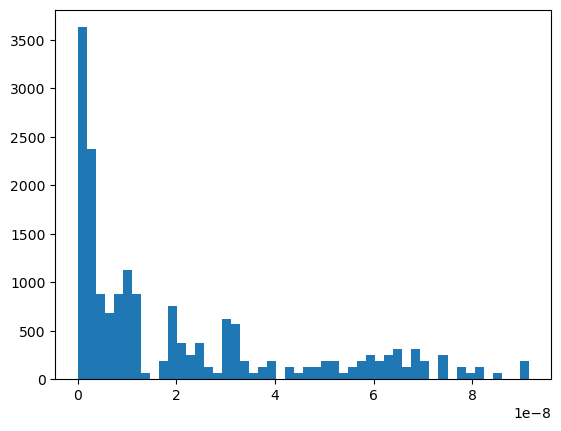

In [12]:
plt.hist(IWSP_GPP, bins=50)
plt.show()

Very similar, but not completely identical. So the simulations are somewhat different, but not enough to show up visually in the figures in the manuscript.

# difference in GPP, NEP, respiration

In [13]:
print("IBSP GPP:", sum(IBSP_GPP))
print("IWSP GPP:", sum(IWSP_GPP))

IBSP GPP: 0.00037826868123386204
IWSP GPP: 0.00038248516536859567


In [14]:
print("IBSP NEP:", sum(IBSP_NEP))
print("IWSP NEP:", sum(IWSP_NEP))

IBSP NEP: 0.0003027071310325513
IWSP NEP: 0.0003062389558233644


In [20]:
print("IBSP autotrophic respiration:", sum(IBSP_AUTORESP))
print("IWSP autotrophic respiration:", sum(IWSP_AUTORESP))

IBSP autotrophic respiration: 7.556155016308352e-05
IWSP autotrophic respiration: 7.62462094922034e-05


In [17]:
print("IBSP heterotrophic respiration:", sum(IBSP_HET_RESP))
print("IWSP heterotrophic respiration:", sum(IWSP_HET_RESP))

IBSP heterotrophic respiration: 0.0
IWSP heterotrophic respiration: 0.0


In [7]:
print("IBSP TLAI:", sum(IBSP_TLAI))
print("IWSP TLAI:", sum(IWSP_TLAI))

IBSP TLAI: 14930.056235969067
IWSP TLAI: 14930.056235969067
